<a href="https://colab.research.google.com/github/abdulkadirturkan/logreg/blob/main/Lin_Log_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install idx2numpy
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!gunzip train-images-idx3-ubyte.gz
!gunzip train-labels-idx1-ubyte.gz

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=c78d5f1b99bbb83827dc6db5d1d6e94b835020afe8958187b26c7cb9754a0ab2
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy
--2024-04-27 06:30:11--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 503 Service Unavailable
2024-04-27 06:30:11 ERROR 503: Service Unavailable.

--2024-04-27 06:30:11--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 503 Service Unavailable
2024-04-27 06:30:11 ERROR 503: Service Unavaila

In [3]:
import torch
import torch.nn as nn
from torch.optim import SGD

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import idx2numpy

In [4]:
num_samples = 500
num_features = 2
X_np, y_np = datasets.make_regression(num_samples, num_features, noise=5, random_state=42)
y_np = np.expand_dims(y_np, axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

In [6]:
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))

X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [7]:
lineer_model = nn.Linear(num_features, 1)
loss_func = nn.MSELoss()
optimizer = SGD(lineer_model.parameters(), lr=0.001)

In [8]:
history = {"epoch": [], "loss": []}

for epoch in range(2000):
    y_hat = lineer_model(X_train)
    loss = loss_func(y_hat, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 20 == 0:
        history["epoch"].append(epoch)
        history["loss"].append(loss.item())

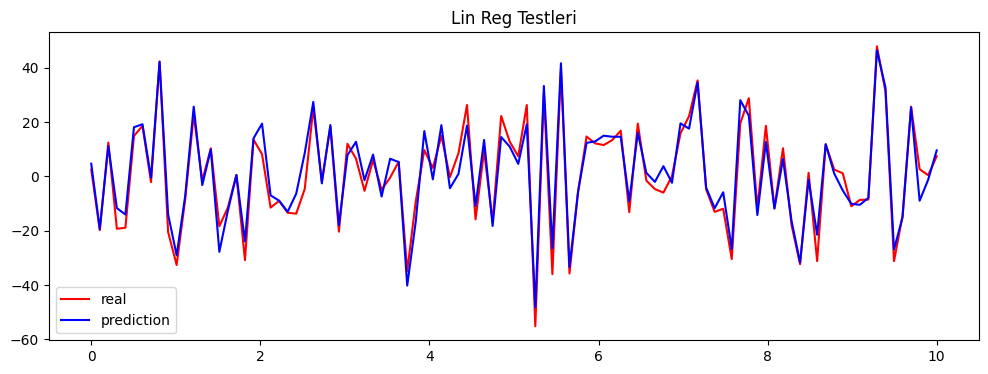

In [9]:
y_predicted = lineer_model(X_test).detach().numpy()
plt.figure(figsize=(12, 4))
plt.title("Lin Reg Testleri")
plt.plot(np.linspace(0, 10, 100), y_test.numpy(), label="real", c="r")
plt.plot(np.linspace(0, 10, 100), y_predicted, label="prediction", c="b")
plt.legend()
plt.show()

In [10]:
!git clone https://github.com/ihpar/cvp.git


Cloning into 'cvp'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 80 (delta 26), reused 68 (delta 14), pack-reused 0
Receiving objects: 100% (80/80), 26.55 MiB | 13.59 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [11]:
%cd cvp/Uygulama

/content/cvp/Uygulama


In [12]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [13]:
class LogReg:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        ones_column = np.ones((num_samples, 1))
        X = np.append(ones_column, X, axis=1)
        self.weights = np.zeros(num_features + 1)

        # gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights)
            y_predicted = sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            self.weights = self.weights - (self.lr * dw)

    def predict(self, X):
        num_samples, _ = X.shape
        ones_column = np.ones((num_samples, 1))
        X = np.append(ones_column, X, axis=1)

        linear_model = np.dot(X, self.weights)
        y_predicted = sigmoid(linear_model)
        y_predicted_classes = np.where(y_predicted > 0.5, 1, 0)
        return y_predicted_classes

    def predict_prob(self, X):
        num_samples, _ = X.shape
        ones_column = np.ones((num_samples, 1))
        X = np.append(ones_column, X, axis=1)

        linear_model = np.dot(X, self.weights)
        return sigmoid(linear_model)

In [14]:
def accuracy(y_true, y_predicted):
    acc = np.sum(y_true == y_predicted) / len(y_predicted)
    return acc

In [15]:
MNIST_DIR = "mnist/"
train_arr = idx2numpy.convert_from_file(MNIST_DIR + "train-images-idx3-ubyte")
train_labels = idx2numpy.convert_from_file(MNIST_DIR + "train-labels-idx1-ubyte")

X_train = train_arr.reshape(60000, -1)
X_train = X_train / 255.0
y_train = np.copy(train_labels)

regressor = []
for digit in range(10):
    X_digit = X_train[y_train == digit]
    y_digit = np.ones(X_digit.shape[0])

    X_n_digit = X_train[y_train != digit]
    y_n_digit = np.zeros(X_n_digit.shape[0])

    X_digit_n_digit = np.append(X_digit, X_n_digit, axis=0)
    y_digit_n_digit = np.append(y_digit, y_n_digit)

    X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_digit_n_digit, y_digit_n_digit, test_size=0.3, random_state=42)

    print(X_train_subset.shape, y_train_subset.shape)
    print(X_test_subset.shape,  y_test_subset)

    regressor_digit = LogReg(lr= 0.001, n_iters = 1000)
    regressor_digit.fit(X_train_subset, y_train_subset)
    regressor.append(regressor_digit)

    y_predictions = regressor_digit.predict(X_test_subset)
    print(f"Reg {digit} acc: {accuracy(y_test_subset, y_predictions)}")

(42000, 784) (42000,)
(18000, 784) [0. 0. 0. ... 1. 0. 0.]
Reg 0 acc: 0.9095
(42000, 784) (42000,)
(18000, 784) [0. 0. 0. ... 1. 0. 0.]
Reg 1 acc: 0.8858333333333334
(42000, 784) (42000,)
(18000, 784) [0. 0. 0. ... 1. 0. 0.]
Reg 2 acc: 0.8993888888888889
(42000, 784) (42000,)
(18000, 784) [0. 0. 0. ... 1. 0. 0.]
Reg 3 acc: 0.8966666666666666
(42000, 784) (42000,)
(18000, 784) [0. 0. 0. ... 1. 0. 0.]
Reg 4 acc: 0.9018333333333334
(42000, 784) (42000,)
(18000, 784) [0. 0. 0. ... 1. 0. 0.]
Reg 5 acc: 0.9083333333333333
(42000, 784) (42000,)
(18000, 784) [0. 0. 0. ... 1. 0. 0.]
Reg 6 acc: 0.9002777777777777
(42000, 784) (42000,)
(18000, 784) [0. 0. 0. ... 1. 0. 0.]
Reg 7 acc: 0.8940555555555556
(42000, 784) (42000,)
(18000, 784) [0. 0. 0. ... 1. 0. 0.]
Reg 8 acc: 0.9016666666666666
(42000, 784) (42000,)
(18000, 784) [0. 0. 0. ... 1. 0. 0.]
Reg 9 acc: 0.8995555555555556


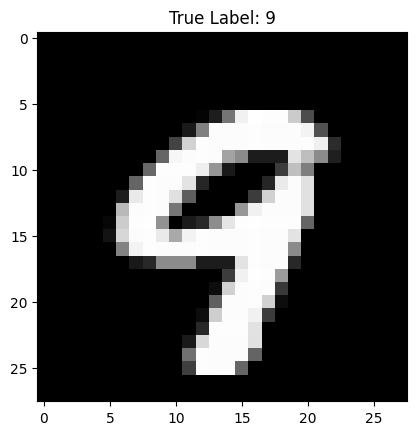

Predictions:
Digit 9: Probability [0.10249428]
Digit 4: Probability [0.07951133]
Digit 7: Probability [0.06258863]
Digit 8: Probability [0.04680939]
Digit 0: Probability [0.04408728]
Digit 6: Probability [0.03453985]
Digit 5: Probability [0.0330677]
Digit 3: Probability [0.02479545]
Digit 2: Probability [0.02390646]
Digit 1: Probability [0.01350699]

Closest Prediction: Digit 9


In [16]:
image_index = 763

image = X_train[image_index]
true_label = y_train[image_index]

plt.imshow(image.reshape(28, 28), cmap="gray")
plt.title(f"True Label: {true_label}")
plt.show()

all_predictions = []
for digit, regressor_digit in enumerate(regressor):
    prediction = regressor_digit.predict_prob(np.array([X_train[image_index]]))
    all_predictions.append((digit, prediction))

sorted_predictions = sorted(all_predictions, key=lambda x: x[1], reverse=True)

print("Predictions:")
for digit, prediction in sorted_predictions:
    print(f"Digit {digit}: Probability {prediction}")

closest_prediction = sorted_predictions[0][0]
print(f"\nClosest Prediction: Digit {closest_prediction}")


In [17]:
correct_predictions = []

for digit, regressor_digit in enumerate(regressor):
    y_test_predicted = regressor_digit.predict(X_test_subset)
    correct_predictions_digit = (y_test_predicted == y_test_subset).astype(int)
    correct_predictions.append(correct_predictions_digit)

# numpy
correct_predictions = np.array(correct_predictions)

# total probability for success
total_success_probability = np.sum(correct_predictions, axis=0) / len(regressor)

print("Total Success Probability for Each Image in the Test Set:")
for i, prob in enumerate(total_success_probability):
    print(f"Image {i}: Probability {prob}")

# overall success rate
overall_success_rate = np.mean(total_success_probability)
print("\nOverall Success Rate:", overall_success_rate)


Görüntülenen çıkış son 5000 satıra kısaltıldı.
Image 13002: Probability 1.0
Image 13003: Probability 1.0
Image 13004: Probability 0.0
Image 13005: Probability 1.0
Image 13006: Probability 1.0
Image 13007: Probability 1.0
Image 13008: Probability 1.0
Image 13009: Probability 1.0
Image 13010: Probability 1.0
Image 13011: Probability 1.0
Image 13012: Probability 1.0
Image 13013: Probability 1.0
Image 13014: Probability 1.0
Image 13015: Probability 1.0
Image 13016: Probability 1.0
Image 13017: Probability 1.0
Image 13018: Probability 1.0
Image 13019: Probability 1.0
Image 13020: Probability 1.0
Image 13021: Probability 1.0
Image 13022: Probability 0.0
Image 13023: Probability 1.0
Image 13024: Probability 1.0
Image 13025: Probability 1.0
Image 13026: Probability 1.0
Image 13027: Probability 1.0
Image 13028: Probability 0.0
Image 13029: Probability 1.0
Image 13030: Probability 1.0
Image 13031: Probability 1.0
Image 13032: Probability 1.0
Image 13033: Probability 1.0
Image 13034: Probability 